In [1]:
from tkinter import *

In [4]:
# Creating the application main window
top = Tk()
# Entering the event main loop
top.mainloop()

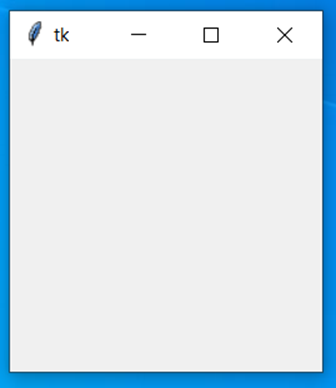


### Tkinter Widgets
- Button - It is used to add various kinds of buttons to the python application
- Canvas - This widget is used to draw the canvas on the window
- MessageBox - This module is used to display the message - box in the desktop based applications

In [5]:
parent = Tk()
redbutton = Button(parent, text = "Red", fg = "red")
redbutton.pack(side=LEFT)
greenbutton = Button(parent, text= "Black", fg = "black")
greenbutton.pack(side=RIGHT)
bluebutton = Button(parent, text="Blue", fg="blue")
bluebutton.pack(side = TOP)
blackbutton = Button(parent, text = "Green", fg="green")
blackbutton.pack(side = BOTTOM)
parent.mainloop()

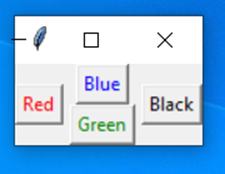

### Egg Catcher Game Using Python
- It is a classic game where the goal is to catch as many eggs as possible.
- In this game, every egg we catch will increase the score and if we miss three eggs, we will lose the game.
- To create an egg catcher game in python, we need to create three different loops.
- One to create new eggs.
- Another to check if the cathcer has caught an egg.
- And the third loop to move the eggs and to check if the eggs have touched the ground.


- **Three important modules are used to create an egg cather game:**
- **Itertools:** to change the colours of the falling eggs.
- **Random:** to make the eggs appear at random positions
- **Tkinter:** to animate the game on the screen.

In [9]:
from itertools import cycle
from random import randrange
from tkinter import Canvas, Tk, messagebox, font

canvas_width = 800
canvas_height = 400

root = Tk()
c = Canvas(root, width=canvas_width, height=canvas_height, background="deep sky blue")
c.create_rectangle(-5, canvas_height-100, canvas_width+5, canvas_height+5, fill="sea green", width=0)
c.create_oval(-80, -80, 120, 120, fill='orange', width=0)
c.pack()

color_cycle = cycle(["light blue", "light green", "light pink", "light yellow", "light cyan"])
egg_width = 45
egg_height = 55
egg_score = 10
egg_speed = 500
egg_interval = 4000
difficulty = 0.95
catcher_color = "blue"
catcher_width = 100
catcher_height = 100
catcher_startx = canvas_width / 2 - catcher_width / 2
catcher_starty = canvas_height - catcher_height - 20
catcher_startx2 = catcher_startx + catcher_width
catcher_starty2 = catcher_starty + catcher_height

catcher = c.create_arc(catcher_startx, catcher_starty, catcher_startx2, catcher_starty2, start=200, extent=140, style="arc", outline=catcher_color, width=3)
game_font = font.nametofont("TkFixedFont")
game_font.config(size=18)


score = 0
score_text = c.create_text(10, 10, anchor="nw", font=game_font, fill="darkblue", text="Score: "+ str(score))

lives_remaining = 3
lives_text = c.create_text(canvas_width-10, 10, anchor="ne", font=game_font, fill="darkblue", text="Lives: "+ str(lives_remaining))

eggs = []

def create_egg():
    x = randrange(10, 740)
    y = 40
    new_egg = c.create_oval(x, y, x+egg_width, y+egg_height, fill=next(color_cycle), width=0)
    eggs.append(new_egg)
    root.after(egg_interval, create_egg)

def move_eggs():
    for egg in eggs:
        (eggx, eggy, eggx2, eggy2) = c.coords(egg)
        c.move(egg, 0, 10)
        if eggy2 > canvas_height:
            egg_dropped(egg)
    root.after(egg_speed, move_eggs)

def egg_dropped(egg):
    eggs.remove(egg)
    c.delete(egg)
    lose_a_life()
    if lives_remaining == 0:
        messagebox.showinfo("Game Over!", "Final Score: "+ str(score))
        root.destroy()

def lose_a_life():
    global lives_remaining
    lives_remaining -= 1
    c.itemconfigure(lives_text, text="Lives: "+ str(lives_remaining))

def check_catch():
    (catcherx, catchery, catcherx2, catchery2) = c.coords(catcher)
    for egg in eggs:
        (eggx, eggy, eggx2, eggy2) = c.coords(egg)
        if catcherx < eggx and eggx2 < catcherx2 and catchery2 - eggy2 < 40:
            eggs.remove(egg)
            c.delete(egg)
            increase_score(egg_score)
    root.after(100, check_catch)

def increase_score(points):
    global score, egg_speed, egg_interval
    score += points
    egg_speed = int(egg_speed * difficulty)
    egg_interval = int(egg_interval * difficulty)
    c.itemconfigure(score_text, text="Score: "+ str(score))

def move_left(event):
    (x1, y1, x2, y2) = c.coords(catcher)
    if x1 > 0:
        c.move(catcher, -20, 0)

def move_right(event):
    (x1, y1, x2, y2) = c.coords(catcher)
    if x2 < canvas_width:
        c.move(catcher, 20, 0)

c.bind("<Left>", move_left)
c.bind("<Right>", move_right)
c.focus_set()
root.after(1000, create_egg)
root.after(1000, move_eggs)
root.after(1000, check_catch)
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\100367722\Anaconda3\envs\ml-venv\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\100367722\Anaconda3\envs\ml-venv\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\Users\100367~1\AppData\Local\Temp/ipykernel_10216/1604098988.py", line 51, in move_eggs
    (eggx, eggy, eggx2, eggy2) = c.coords(egg)
  File "C:\Users\100367722\Anaconda3\envs\ml-venv\lib\tkinter\__init__.py", line 2766, in coords
    self.tk.call((self._w, 'coords') + args))]
_tkinter.TclError: invalid command name ".!canvas"


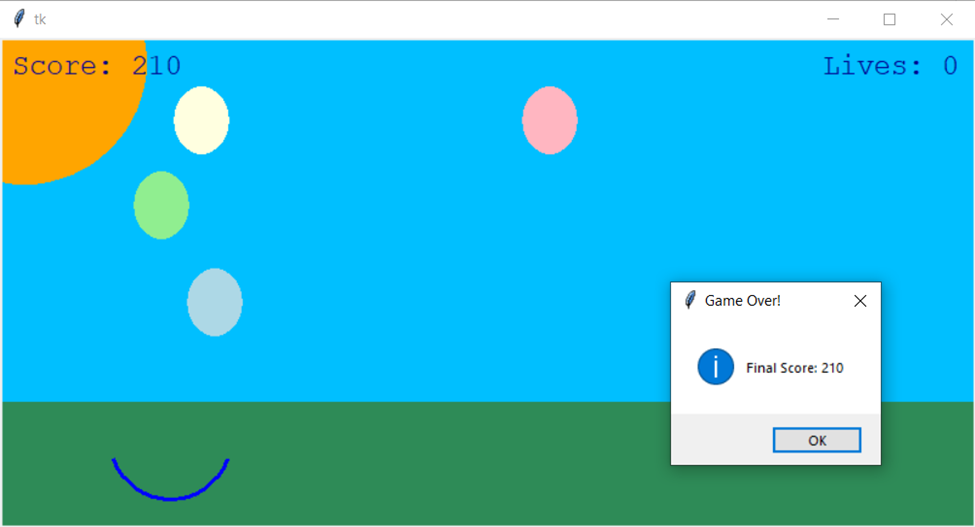